In [1]:
# Import all necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# One-hot encoding: convert numerical labels into one-hot encoding.
from sklearn.preprocessing import label_binarize
# Metrics.
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, f1_score
from sklearn.metrics import precision_score, recall_score, classification_report

In [2]:
# Reset PN-sequence generator.
seed = 42
np.random.seed(seed)

### Criando exemplos de 3 classes.

In [3]:
# Define the number of different classes.
numberOfClasses = 3

# Number of examples.
N = 1000

# Create a 3-class dataset for classification.
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=N, centers=centers, random_state=seed)

### Plotando as 3 classes.

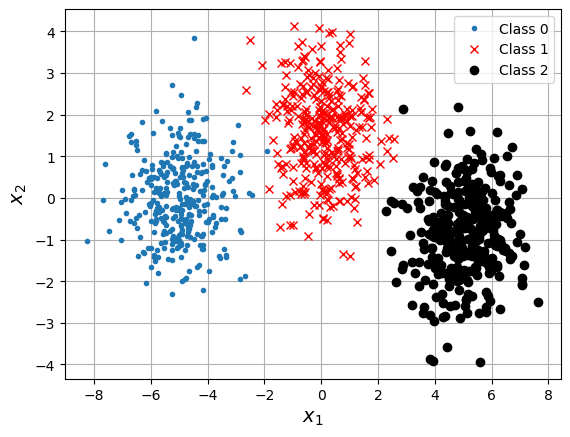

In [4]:
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)
idx2 = np.argwhere(y == 2)

plt.plot(X[idx0,0], X[idx0,1], '.', label='Class 0')
plt.plot(X[idx1,0], X[idx1,1], 'rx', label='Class 1')
plt.plot(X[idx2,0], X[idx2,1], 'ko', label='Class 2')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.legend()
plt.grid()
plt.show()

### Dividindo o conjunto total em conjuntos para treinamento e validação.

In [5]:
# Split array into random train and test subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

print('Tamanho do conjunto de treinamento:', len(y_train))
print('Tamanho do conjunto de validação:', len(y_test))

Tamanho do conjunto de treinamento: 700
Tamanho do conjunto de validação: 300


### Formato apropriado para as funções discriminantes.

**OBS**.: O formato adotado para as funções discriminantes é a da reta:
$$g(\textbf{X}) = \hat{a}_0 + \hat{a}_1 x_1 + \hat{a}_2 x_2.$$

### Instanciando e treinando o classificador.

**Observações**:

+ Como temos mais de 2 classes, instanciamos um objeto da classe `LogisticRegression` para operar como **regressor softmax**, configurando o parâmetro `multi_class` como `'multinomial'`. 

+ Lembrem-se que poderíamos também usar a estratégia `um-contra-o-resto`, configurando o parâmetro `multi_class` como `'ovr'`, que é o valor padrao deste parâmetro.

In [6]:
# Instantiate LogisticRegression object for multi-class case.
model = LogisticRegression(multi_class='multinomial', random_state=seed)

# Train model.
model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', random_state=42)

### Plotando as regiões de decisão.

**OBS:** Notem que a matriz de atributos criada para plotarmos as regiões de decisão também deve ter a mesma forma que as matrizes de atributos criadas para o treinamento e validação.

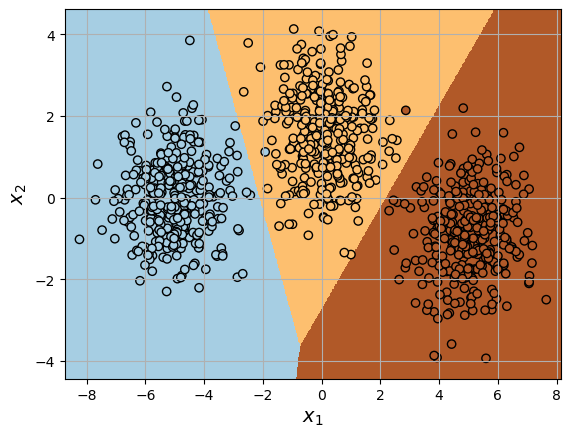

In [7]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.grid()

plt.show()

### Plotando a matriz de confusão.

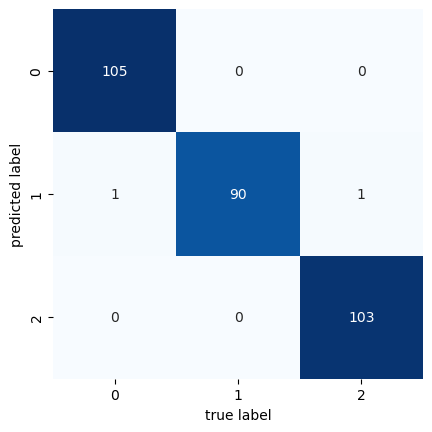

In [8]:
# Predict.
y_pred = model.predict(X_test)

# Plot the confusion matrix.
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=range(numberOfClasses), yticklabels=range(numberOfClasses), cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

### Plotando as curvas ROC.

**Observações**: 

+ Lembrem-se que a curva ROC é apropriada para problemas de classificação binária.


+ No caso multi-classes, devemos utilizar as estratégias `um-contra-o-resto` ou `um-contra-um` e plotar várias curvas ROC de classificadores binários.


+ Como temos 3 classes, usaremos a abordagem *um-contra-o-resto* para plotar 3 curvas ROC de 3 classificadores binários: 
    + Classificador 1: classe 0 (+) contra classes 1 e 2 (-).
    + Classificador 2: classe 1 (+) contra classes 0 e 2 (-).
    + Classificador 3: classe 2 (+) contra classes 0 e 1 (-).


+ Compara-se o desempenho do classificador com o desempenho de um classificador puramente aleatório.


+ No caso abaixo, o classificador tem como saída a classe 0 ou 1 com a mesma probabilidade, ou seja, 50%.

#### Convertendo o vetor de rótulos de teste na codificação one-hot.

In [9]:
# Binarize the test targets.
y_test_bin = label_binarize(y_test, classes=range(numberOfClasses))

# Apresento os 10 primeiros valores.
print('Input values:\n', y_test[0:10])
print('Output shape:', y_test_bin.shape)
print('Output values:\n', y_test_bin[0:10,:])

Input values:
 [0 0 2 0 2 1 1 2 1 0]
Output shape: (300, 3)
Output values:
 [[1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]]


**Observação**

+ Percebam que após a conversão, cada coluna da `matriz` resultante está no formato `um-contra-o-resto`, onde apenas os exemplos da classe positiva tem o valor igual a 1 e todos os demais exemplos (classe negativa) são iguais a 0.

#### Calculando as probabilidades de cada exemplo.

Para plotar a curva ROC, precisamos das probabilidades de cada classe para os exemplos de entrada, na sequência, variamos o valor do limiar de discretização, $T$.

**Observação**

+ Para obtermos as probabilidades de cada classe para os exemplos de entrada, devemos usar o método `predict_proba` da classe `LogisticRegression`.

In [10]:
# Getting the probabilities for each class.
y_prob = model.predict_proba(X_test)

print('Probabilidades:')
print(y_prob[0:10, :])

Probabilidades:
[[9.99356724e-01 6.43275663e-04 2.36589764e-11]
 [9.94763745e-01 5.23617832e-03 7.65404112e-08]
 [4.59954188e-17 3.49293378e-06 9.99996507e-01]
 [9.99999296e-01 7.04113882e-07 2.86868038e-14]
 [4.94445539e-12 3.44199138e-04 9.99655801e-01]
 [8.60360863e-03 9.91394989e-01 1.40238973e-06]
 [1.39743375e-03 9.96618788e-01 1.98377849e-03]
 [2.71325649e-13 1.59432937e-04 9.99840567e-01]
 [8.14052023e-04 9.98190660e-01 9.95287918e-04]
 [9.99999234e-01 7.65533194e-07 8.25059160e-17]]


#### Plotando as curvas ROC.

**OBS**.: Plotamos **uma curva ROC para cada coluna** das matrizes de probabilidade e de rótulos, pois para cada coluna, uma classe é a postitiva e as demais são unidas para formar a classe negativa.

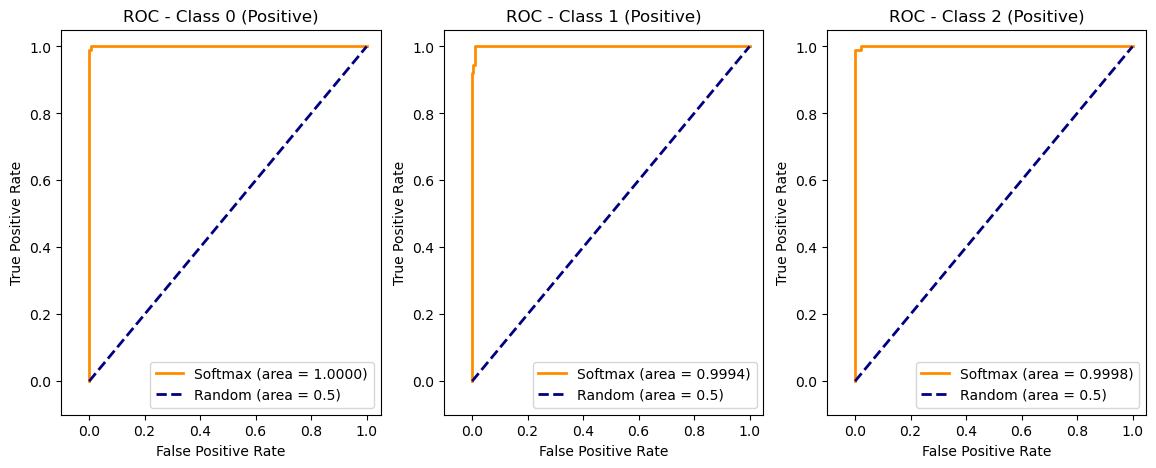

In [11]:
# Compute ROC curve and ROC area for each class.
fpr = dict()
tpr = dict()
roc_auc = dict()
plt.figure(figsize=(14, 5))
lw = 2
for i in range(numberOfClasses):
    # Calculating ROC curve and ROC AUC.
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    # Plotting ROC curve for class i.
    ax = plt.subplot(1, numberOfClasses, i + 1)
    plt.plot(fpr[i], tpr[i], color='darkorange', lw=lw, label='Softmax (area = %1.4f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='Random (area = 0.5)')
    plt.xlim([-0.1, 1.05])
    plt.ylim([-0.1, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC - Class '+str(i)+' (Positive)')
    plt.legend(loc="lower right")

plt.show()

### Relatório com as principais métricas de classificação.

In [12]:
print(classification_report(y_test, y_pred, digits=6))

              precision    recall  f1-score   support

           0   1.000000  0.990566  0.995261       106
           1   0.978261  1.000000  0.989011        90
           2   1.000000  0.990385  0.995169       104

    accuracy                       0.993333       300
   macro avg   0.992754  0.993650  0.993147       300
weighted avg   0.993478  0.993333  0.993354       300



#### Observações:

+ O parâmetro `digits` configura o número desejado de casas decimais após a vírgula.


+ `macro avg` dá média aritmética **simples** das métricas para cada classe.
    + Ela atribui o mesmo peso para cada classe, independentemente do número de amostras em cada uma delas. 


+ `weighted avg` dá média aritmética **ponderada** das métricas para cada classe.
    + Ela atribui pesos diferentes para cada classe, levando em consideração o número de amostras em cada uma delas.
    + Assim, classes com mais amostras tem uma contribuição maior no cálculo da métrica.
    
    
+ `weighted avg` é útil quando as classes são desbalanceadas, ou seja, quando algumas classes têm um número muito maior de amostras do que outras.


+ `macro avg` é útil quando as classes são balanceadas, ou seja, quando todas as classes têm aproximadamente o mesmo número de amostras.